In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [233]:
# Load the CSV with vectors stored as lists in a column
df = pd.read_csv(r"E:\Academics\Semester-6\DS 203(Prog. for DS)\Project\Code\doc2vec\doc2vec_training_analysis\processed_df2.csv")
df['vector'] = df['vector'].apply(eval)  # Convert stringified lists to actual lists

In [234]:

# Assuming df contains a column 'vector' with 300D list-like vectors
vectors = np.array(df['vector'].tolist())

# Standardize before PCA
scaler = StandardScaler()
vectors_scaled = scaler.fit_transform(vectors)

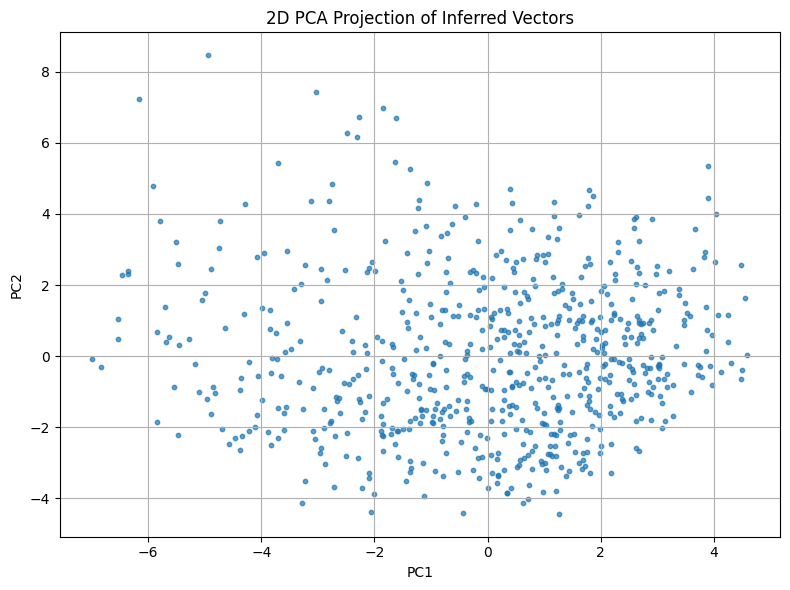

In [235]:
### 1. 2D PCA Visualization
pca_2d = PCA(n_components=2)
vectors_2d = pca_2d.fit_transform(vectors_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], alpha=0.7, s=10)
plt.title('2D PCA Projection of Inferred Vectors')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.tight_layout()
plt.show()


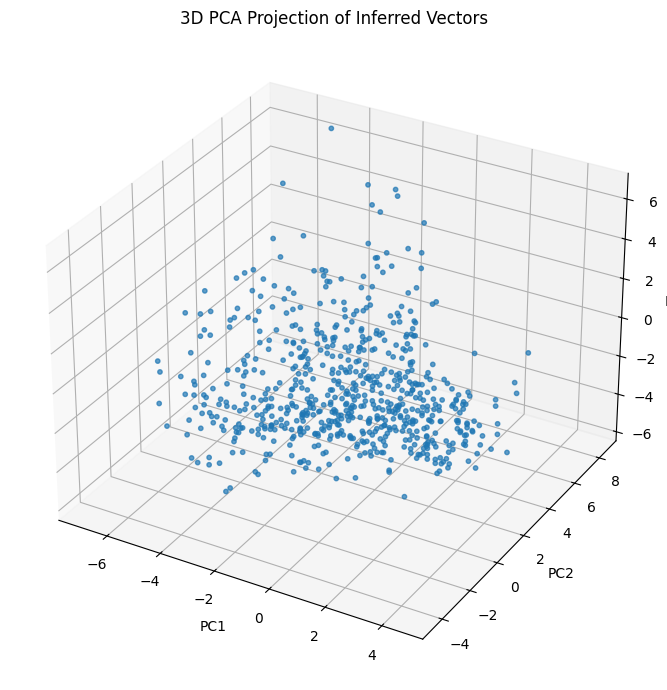

In [236]:
### 2. 3D PCA Visualization
pca_3d = PCA(n_components=3)
vectors_3d = pca_3d.fit_transform(vectors_scaled)

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vectors_3d[:, 0], vectors_3d[:, 1], vectors_3d[:, 2], s=10, alpha=0.7)
ax.set_title('3D PCA Projection of Inferred Vectors')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.tight_layout()
plt.show()

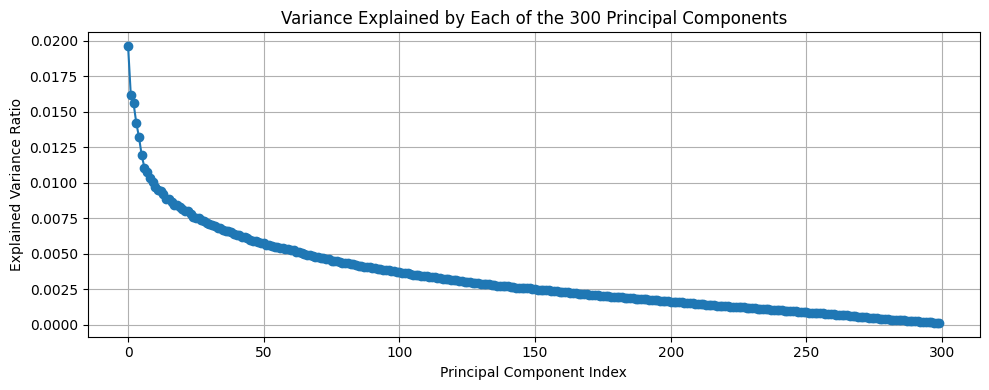

In [237]:
### 3. Plot Variance Explained by Each of the 300 Principal Components
pca_full = PCA(n_components=300)
pca_full.fit(vectors_scaled)
explained_var = pca_full.explained_variance_ratio_

plt.figure(figsize=(10, 4))
plt.plot(explained_var, marker='o')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Explained by Each of the 300 Principal Components')
plt.grid(True)
plt.tight_layout()
plt.show()


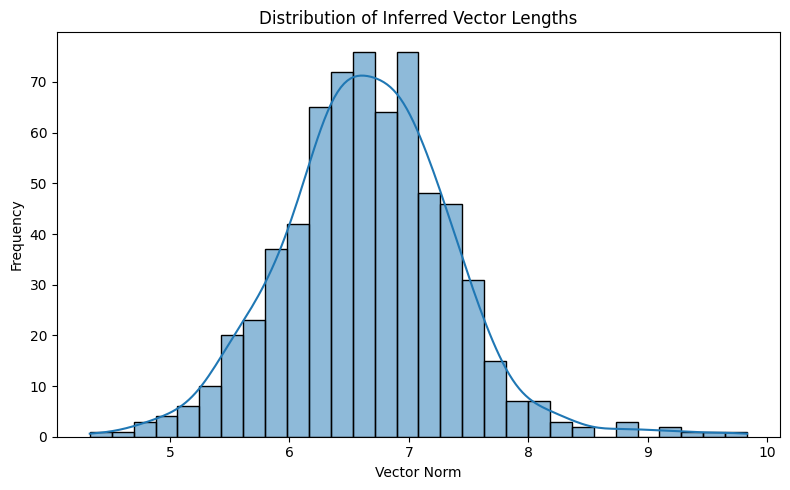

In [238]:
### 4. Distribution of Vector Lengths
vector_lengths = np.linalg.norm(vectors, axis=1)

plt.figure(figsize=(8, 5))
sns.histplot(vector_lengths, kde=True, bins=30)
plt.title('Distribution of Inferred Vector Lengths')
plt.xlabel('Vector Norm')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [239]:
# Fixed query index
query_idx = 10
query_vec = vectors[query_idx].reshape(1, -1)

# Compute distances
dists = euclidean_distances(query_vec, vectors)[0]
top_indices = np.argsort(dists)[1:21]  # Exclude self, get top 20

print(f"Selected summary index: {query_idx}")
print("Query Summary Preview:")
print(df.loc[query_idx, 'summary'][:400] + "...\n")

print("Top-20 closest summaries by Euclidean distance:")
for rank, i in enumerate(top_indices, 1):
    preview = df.loc[i, 'summary'][:500].replace('\n', ' ')
    print(f"{rank}. Index: {i}, Distance: {dists[i]:.4f}")
    print(f"    Preview: {preview}...\n")

Selected summary index: 10
Query Summary Preview:
problem with heatmap is that they don't capture sufficient information but they play important role when we have multiple parameters and it is not feasible to plot all parameters therefore heatmap helps in pair wise analysis.variance influence factor explain a parameter based other all other parameters excluding itself cif  is xi=f( xj not equals xi ) indentify the vif of the features of the vif i...

Top-20 closest summaries by Euclidean distance:
1. Index: 590, Distance: 7.1454
    Preview: we continued with the correlation problems. we observed the heat maps for perfectly co-related data and partially correlated data. heatmaps are more coherent if they are created after sorting the data. when we calculate vif, we do not process the values of y but only x-values. vif is simply the function of x. f(x(i != j)). in this method, we progressively eliminate the features based on threshold vif. we have to decide on the threshold value of r^2